In [1]:
import cylinder_inertial as inertial
import cylinder_bessel   as bessel
import cylinder_pipe     as pipe

import numpy as np
import scipy.special     as spec
import matplotlib.pyplot as plt

%matplotlib inline

def show(Q):
    plt.plot(r,Q)
    
def err(x):
    print(max_norm(x))

def max_norm(x):
    return np.max(np.abs(x))

/usr/local/lib/python3.4/site-packages/scipy/linalg/decomp.py:61: RuntimeWarning: divide by zero encountered in true_divide
  w = (alphar + _I * alphai) / beta
/usr/local/lib/python3.4/site-packages/scipy/linalg/decomp.py:61: RuntimeWarning: invalid value encountered in true_divide
  w = (alphar + _I * alphai) / beta


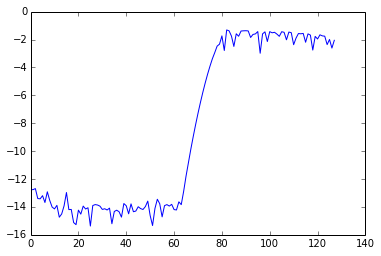

In [2]:
N, m = 128, 1
vals, r, u = bessel.eigensystem(N,m)
Z=np.abs(spec.jv(m,np.sqrt(vals)))
plt.plot(np.log10(Z))

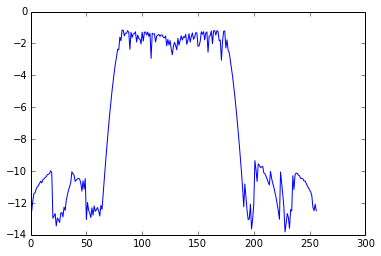

In [3]:
N, m = 128, 1
vals, r, vr, vth, p = inertial.eigensystem(N,m,1)

vals=vals[0:2*N+1]
x = np.sqrt(1-vals**2)/vals
Z=np.abs(0.5*vals*x*(spec.jv(m-1,x)-spec.jv(m+1,x)) + m*spec.jv(m,x))
plt.plot(np.log10(Z))

In [4]:
N, m = 128, 1
nu, alpha = 1e-4, 1 
vals, r, u, v, w, p = pipe.eigensystem(N,m,nu,alpha)

/usr/local/lib/python3.4/site-packages/scipy/linalg/decomp.py:57: RuntimeWarning: divide by zero encountered in true_divide
  w = alpha / beta


(-0.0227049145535-0.951481194735j)
(-0.0472321995947-0.273788709331j)


/usr/local/lib/python3.4/site-packages/numpy/core/numeric.py:462: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


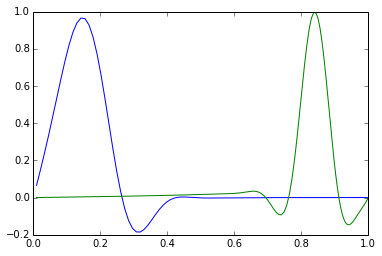

In [5]:
print(vals[0])
show(w[0]/max_norm(w[0]))
print(vals[1])
show(-w[1]/max_norm(w[1]))